<a href="https://colab.research.google.com/github/emakhankov/UAI-ML-Integration_18/blob/master/UAI_ML_Integration_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [0]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [57]:
train_images.shape

(60000, 28, 28)

In [0]:
img_rows, img_cols = 28, 28
train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)


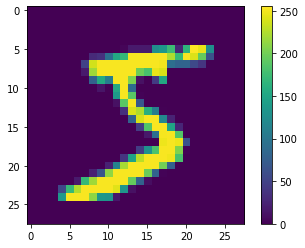

In [59]:
plt.figure()
plt.imshow(train_images[0].reshape(img_rows, img_cols))
plt.colorbar()
plt.grid(False)
plt.show()

In [60]:
print(train_labels[0])

5


In [0]:
y_train = keras.utils.to_categorical(train_labels, num_classes)
y_test = keras.utils.to_categorical(test_labels, num_classes)

In [62]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [50]:
st_mean = np.mean(train_images)
st_std = np.std(train_images)
st_mean, st_std

(33.318421449829934, 78.56748998339798)

In [0]:
train_images = (train_images - st_mean) / st_std
test_images = (test_images - st_mean) / st_std

In [52]:
np.mean(train_images), np.std(train_images) # Проверим должно быть 0 и 1

(-3.064638490070051e-17, 0.9999999999999998)

In [0]:
batch_size = 128
num_classes = 10
epochs = 30


In [64]:


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, padding='SAME', kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(keras.layers.Conv2D(128, (3, 3), padding='SAME', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.05))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), padding='SAME', activation='relu'))
model.add(keras.layers.Conv2D(128, (3, 3), padding='SAME', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.05))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), padding='SAME', activation='relu'))
model.add(keras.layers.Conv2D(128, (3, 3), padding='SAME', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.05))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(576, activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(train_images, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(test_images, y_test))
score = model.evaluate(test_images, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
469/469 [==============================] - 23s 49ms/step - loss: 4.0810 - accuracy: 0.1452 - val_loss: 1.7626 - val_accuracy: 0.4220
Epoch 2/30
469/469 [==============================] - 23s 48ms/step - loss: 2.0299 - accuracy: 0.3352 - val_loss: 1.0974 - val_accuracy: 0.7222
Epoch 3/30
469/469 [==============================] - 22s 48ms/step - loss: 1.3769 - accuracy: 0.5389 - val_loss: 0.7152 - val_accuracy: 0.8235
Epoch 4/30
469/469 [==============================] - 23s 48ms/step - loss: 0.9996 - accuracy: 0.6699 - val_loss: 0.4950 - val_accuracy: 0.8738
Epoch 5/30
469/469 [==============================] - 23s 48ms/step - loss: 0.7629 - accuracy: 0.7487 - val_loss: 0.3726 - val_accuracy: 0.8973
Epoch 6/30
469/469 [==============================] - 23s 48ms/step - loss: 0.6119 - accuracy: 0.8000 - val_loss: 0.2982 - val_accuracy: 0.9147
Epoch 7/30
469/469 [==============================] - 23s 48ms/step - loss: 0.5086 - accuracy: 0.8345 - val_loss: 0.2503 - val_accuracy:

In [0]:
model.save('model_mnist.h5')